In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def computeNormGrayHistogram(img):

    #Take in the given image, get a grayscale version of it
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #Flatten the 2D array to make it one long list of pixel values
    gray = np.ndarray.flatten(np.array(gray))

    #elementAmount = len(gray)
    #print(len(gray))
    #print(gray)

    #split up the bin intervals from 0 to 255 across 32 values and plot the greyscale histogram 
    interv = np.linspace(0,255,num = 32)
    #print(interv)
    #hist_out = plt.hist(gray, interv, density=True) #density controls whether the histogram gets normalized to 1 or not.
    hist_out = custom_hist(gray,True)
    plt.title("Normalized Histogram of Grayscale Image")
    plt.xlabel("Grayscale Pixel Value")
    plt.ylabel("Normalized Frequency")

    return hist_out

def custom_hist(pixel_vals, normalized):
    temp_vals = pixel_vals
    bins = np.zeros(32)
    sum_val = 0
    for i in range(32):
        for j in temp_vals:
            if j < (((i+1)*8)) and j > ((i)*8):
                bins[i] += 1
                sum_val += j
    if normalized:
        bins = bins/sum_val
    plt.bar(np.arange(0, 256, 8), bins, align="edge", width=8)
    plt.title("Normalized Histogram of Color Image")
    plt.xlabel("Pixel Value")
    plt.ylabel("Normalized Frequency")
    plt.show()
    return 0

def meanFilter(img, winSize):

    #get img padding amount
    pad_amount = int(winSize/2)
    rank = 0
    output_img = img

    #create padded image
    img_padded = cv2.copyMakeBorder(img, pad_amount, pad_amount, pad_amount, pad_amount, cv2.BORDER_REFLECT)
    array_padded = np.array(img_padded)

    #get image and padded image dimensions
    imRow, imCol = np.shape(img)[0:2]
    imRow_p, imCol_p = np.shape(img_padded)[0:2]

    for y in range(imRow):
        for x in range(imCol):
            mean = 0
            cur_win = array_padded[y:y+winSize:1,x:x+winSize:1]
            mean =  np.sum(cur_win/np.size(cur_win))
            output_img[y, x] = mean
    return output_img

def medianFilter(img, winSize):

    #get img padding amount
    pad_amount = int(winSize/2)
    rank = 0
    output_img = img

    #create padded image
    img_padded = cv2.copyMakeBorder(img, pad_amount, pad_amount, pad_amount, pad_amount, cv2.BORDER_REFLECT)
    array_padded = np.array(img_padded)

    #get image and padded image dimensions
    imRow, imCol = np.shape(img)[0:2]
    imRow_p, imCol_p = np.shape(img_padded)[0:2]

    for y in range(imRow):
        for x in range(imCol):
            median = 0
            cur_win = array_padded[y:y+winSize:1,x:x+winSize:1]
            median =  np.median(cur_win)
            output_img[y, x] = median
    return output_img

def ObjectFilter(img, template):
    
    #get img padding amount
    temp_vert, temp_horz = np.shape(template)
    pad_amount_vert, pad_amount_horz = int(np.shape(template)/2)
    #pad_amount = int(winSize/2)
    rank = 0
    output_img = img

    #create padded image
    img_padded = cv2.copyMakeBorder(img, pad_amount_vert, pad_amount_vert, pad_amount_horz, pad_amount_horz, cv2.BORDER_REFLECT)
    array_padded = np.array(img_padded)

    #get image and padded image dimensions
    imRow, imCol = np.shape(img)[0:2]
    imRow_p, imCol_p = np.shape(img_padded)[0:2]

    for y in range(imRow):
        for x in range(imCol):
            #mean = 0
            cur_win = array_padded[y:y+temp_vert:1,x:x+temp_horz:1]
            #mean =  np.median(cur_win)
            
            pix_val = np.sum(np.abs(cur_win-template)) 
            output_img[y, x] = pix_val
    return output_img




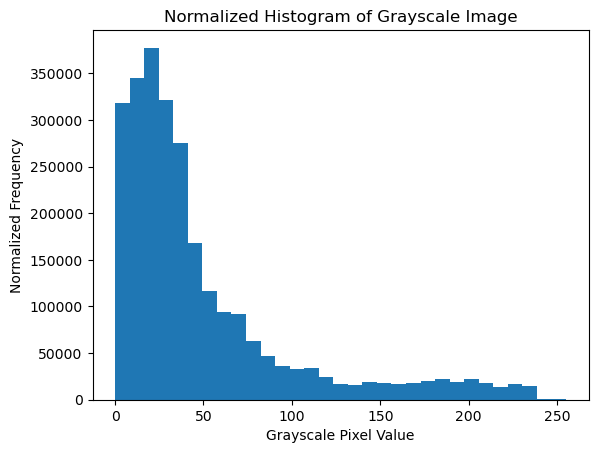

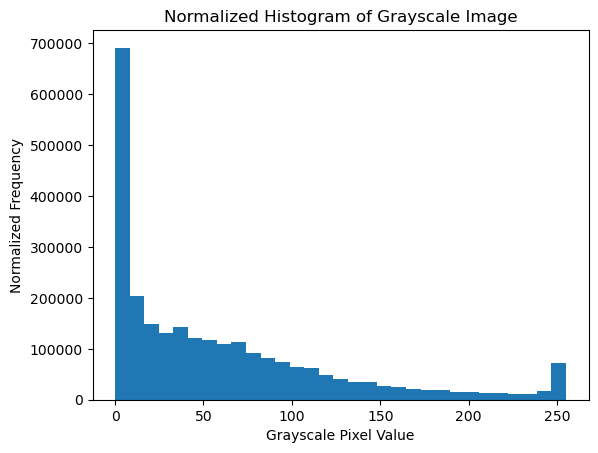

(array([691271., 204183., 147962., 131014., 142941., 121888., 116903.,
       109455., 113628.,  92030.,  82554.,  73432.,  64573.,  62615.,
        48133.,  41620.,  35766.,  35256.,  27222.,  24370.,  21945.,
        19526.,  19832.,  15808.,  14389.,  13147.,  13264.,  10807.,
        11818.,  18000.,  71448.]), array([  0.        ,   8.22580645,  16.4516129 ,  24.67741935,
        32.90322581,  41.12903226,  49.35483871,  57.58064516,
        65.80645161,  74.03225806,  82.25806452,  90.48387097,
        98.70967742, 106.93548387, 115.16129032, 123.38709677,
       131.61290323, 139.83870968, 148.06451613, 156.29032258,
       164.51612903, 172.74193548, 180.96774194, 189.19354839,
       197.41935484, 205.64516129, 213.87096774, 222.09677419,
       230.32258065, 238.5483871 , 246.77419355, 255.        ]), <BarContainer object of 31 artists>)
(array([675594., 205496., 152242., 135954., 148193., 126825., 121688.,
       114440., 118474.,  95526.,  85711.,  76364.,  67215.,  65686.,

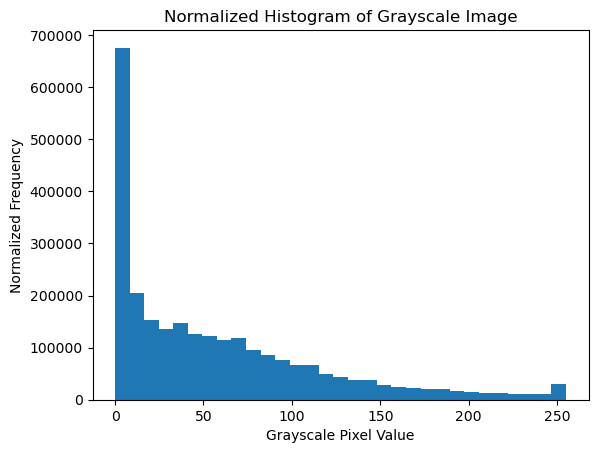

In [16]:

img = cv2.imread('mural.jpg')
hist = computeNormGrayHistogram(img)
plt.show()
img = cv2.imread('mural_noise1.jpg')
hist = computeNormGrayHistogram(img)
plt.show()
#print(hist)
img = cv2.imread('mural_noise2.jpg')
hist = computeNormGrayHistogram(img)
#print(hist)
plt.show()

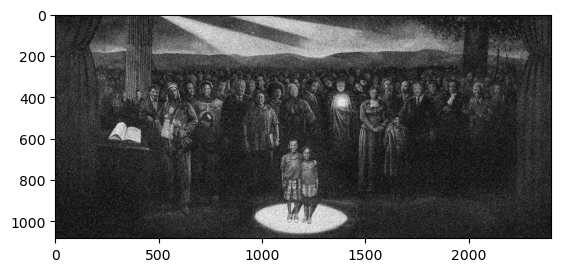

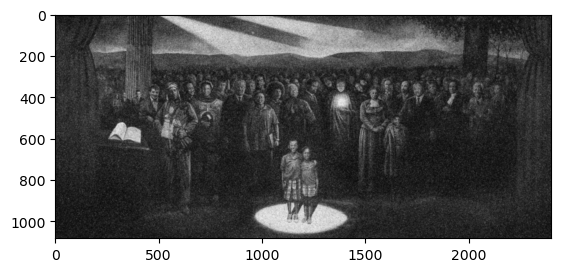

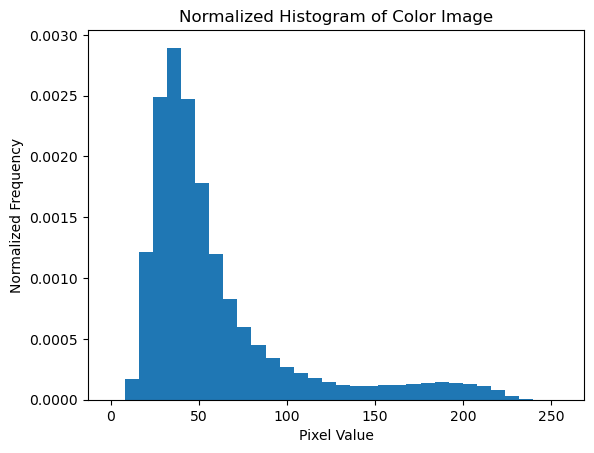

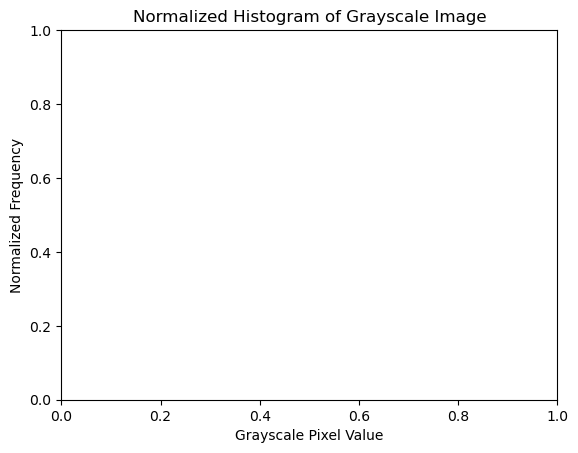

In [40]:
img = cv2.imread('mural_noise1.jpg')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
mean_filtered_img = meanFilter(img, 5)
cv2.imshow("img filtered mean", mean_filtered_img)
plt.imshow(mean_filtered_img, cmap='gray', vmin=0, vmax=255)
plt.show()

hist = computeNormGrayHistogram(mean_filtered_img)
plt.show()

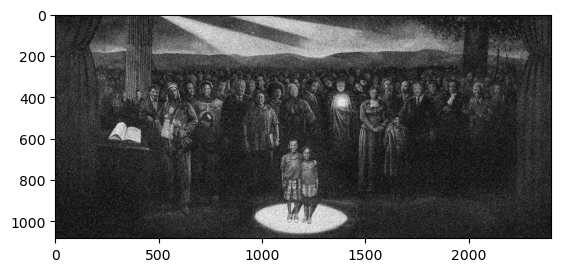

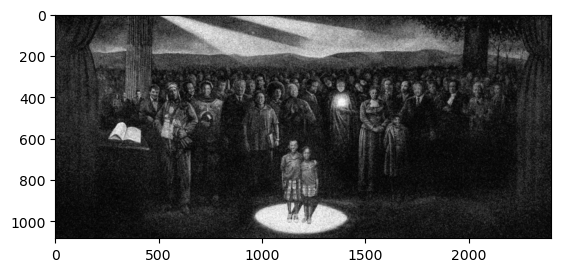

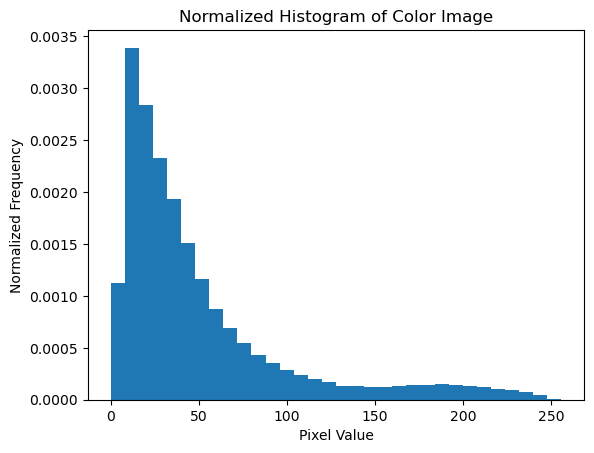

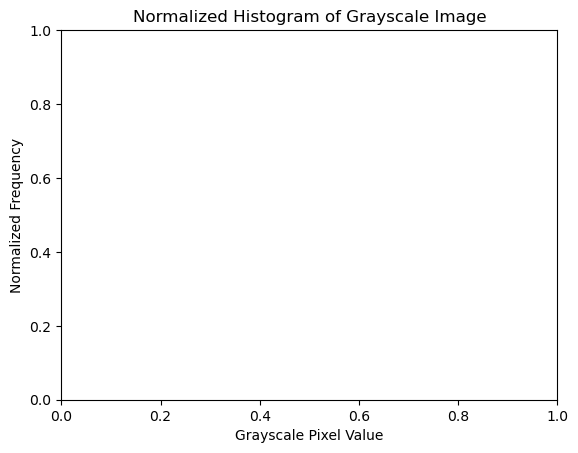

In [41]:
img = cv2.imread('mural_noise1.jpg')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
#cv2.imshow("mural_noise_1", img)
#cv2.waitKey(3000)
#cv2.destroyAllWindows()
median_filtered_img = medianFilter(img, 5)
plt.imshow(median_filtered_img, cmap='gray', vmin=0, vmax=255)
plt.show()

hist = computeNormGrayHistogram(median_filtered_img)
plt.show()

#cv2.imshow("img filtered median", median_filtered_img)
#cv2.waitKey(15000)
#cv2.destroyAllWindows()

(393, 974)


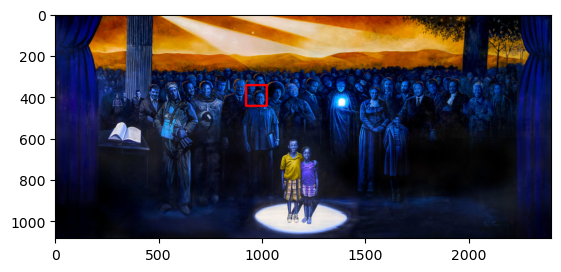

In [39]:
img = cv2.imread('mural.jpg')
template = cv2.imread('template.jpg')

img_out = cv2.matchTemplate(img, template, cv2.TM_CCORR_NORMED)
target_pos = np.unravel_index(img_out.argmax(), np.shape(img_out))
print(target_pos)

target_box = cv2.rectangle(img,(target_pos[1]-50,target_pos[0]-50), (target_pos[1]+50, target_pos[0]+50), color=(255,0,0), thickness=10)
#target_box = cv2.rectangle(img,(50,50), (1000, 2000), color=(0,255,0), thickness=-1)
plt.imshow(target_box, cmap='gray', vmin=0, vmax=255)
plt.show()

cv2.imshow("img filtered median", target_box)
cv2.imwrite("target_box.jpg", target_box)
cv2.waitKey(3000)
cv2.destroyAllWindows()
